In [13]:
!pip install pydicom
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pydicom as dicom
from google.colab.patches import cv2_imshow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 16.0 MB/s eta 0:00:00


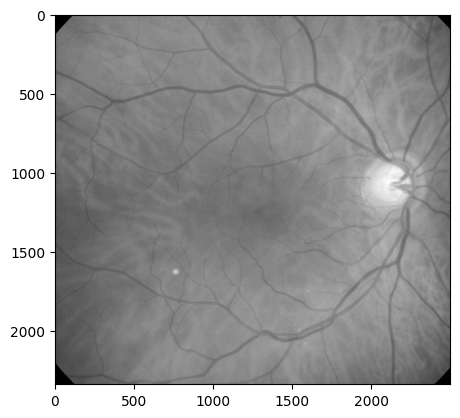

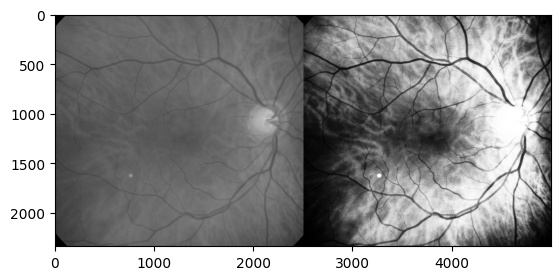

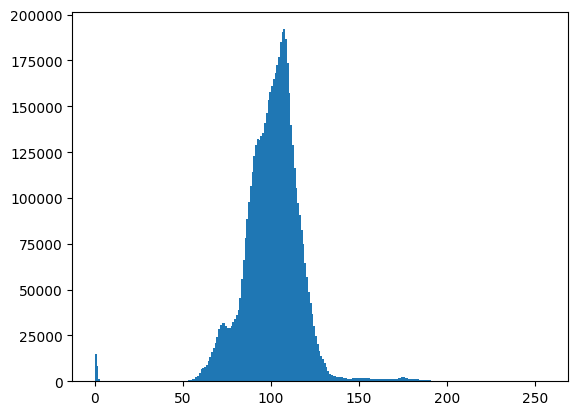

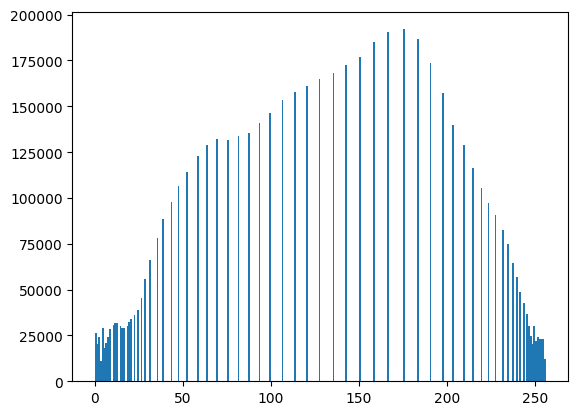

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Digital Image Processing Dataset/Retina/Eye_Data/images/11_g.jpg', 0).astype(np.uint8)
#image = cv2.imread('/content/drive/MyDrive/Digital Image Processing Dataset/Spine/01-July-2019-19.jpg', 0).astype(np.uint8)

image=image[:,500:3000]


Equ = cv2.equalizeHist(image)
res = np.hstack((image,Equ))

plt.figure()
plt.imshow(image, cmap='gray')

plt.figure()
plt.imshow(res, cmap='gray')

plt.figure()
plt.hist(image.ravel(), 256, [0,256]);

plt.figure()
plt.hist(Equ.ravel(), 256, [0,256]);


In [ ]:
image.shape

(2336, 3504)

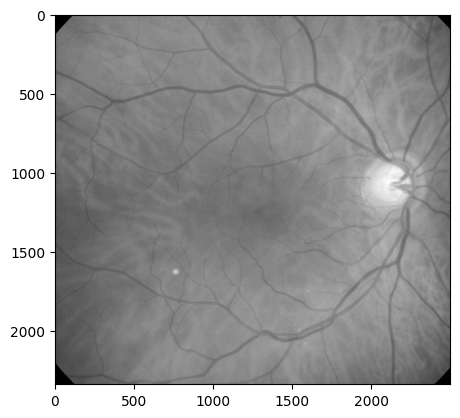

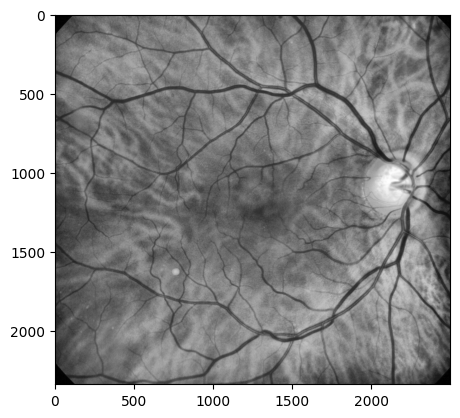

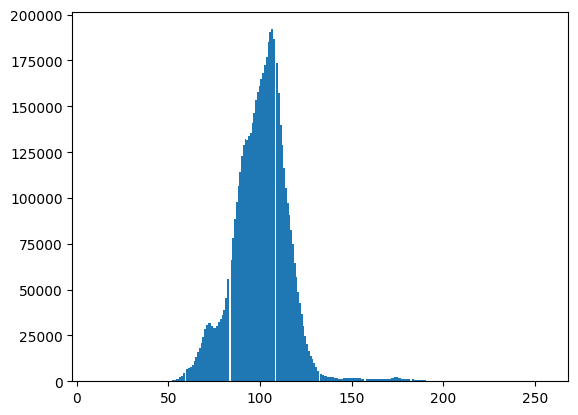

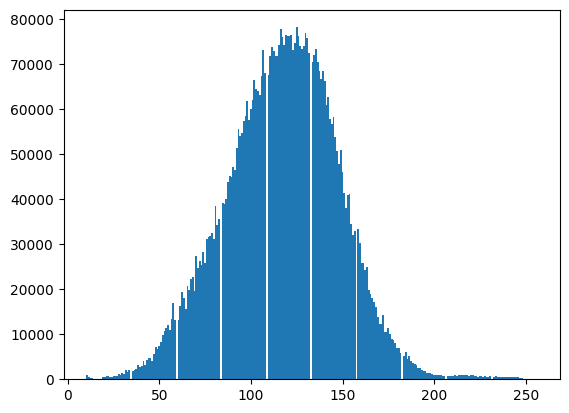

In [ ]:
clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8,8))
Im_CLAHE = clahe.apply(image[:,:])

plt.figure()
plt.imshow(image , cmap='gray')
plt.figure()
plt.imshow(Im_CLAHE , cmap='gray')

plt.figure()
plt.hist(image.ravel(), 256, [10,256]);

plt.figure()
plt.hist(Im_CLAHE.ravel(), 256, [10,256]);

In [ ]:
from skimage.metrics import structural_similarity as compare_ssim

In [ ]:
(score, diff) = compare_ssim(image[:,:,1], Im_Equ, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(round(score, 4)))

SSIM: 0.6011


In [ ]:
(score, diff) = compare_ssim(image[:,:,1], Im_CLAHE, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(round(score, 4)))

SSIM: 0.7752


In [ ]:
def mse(imageA, imageB):
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	return err

In [ ]:
score = mse(image[:,:,1], Im_Equ)
print(round(score , 4))

4432.3656


In [ ]:
score = mse(image[:,:,1], Im_CLAHE)
print(round(score , 4))

599.3837


In [ ]:
psnr1 = cv2.PSNR(image[:,:,1], Im_Equ)
psnr2 = cv2.PSNR(image[:,:,1], Im_CLAHE)

print(psnr1)
print(psnr2)

11.664447857868495
20.353754307013887
